In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states
import networkx as nx
from model import create_model
import tensorflow as tf
from mutate import mutate_dag
from crossover import crossover
from Individual import Individual
from Generation import Generation
import visualkeras

2023-12-11 12:27:44.684779: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 12:27:44.716882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 12:27:44.716916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 12:27:44.717984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 12:27:44.723789: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 12:27:44.724321: I tensorflow/core/platform/cpu_feature_guard.cc:1

input


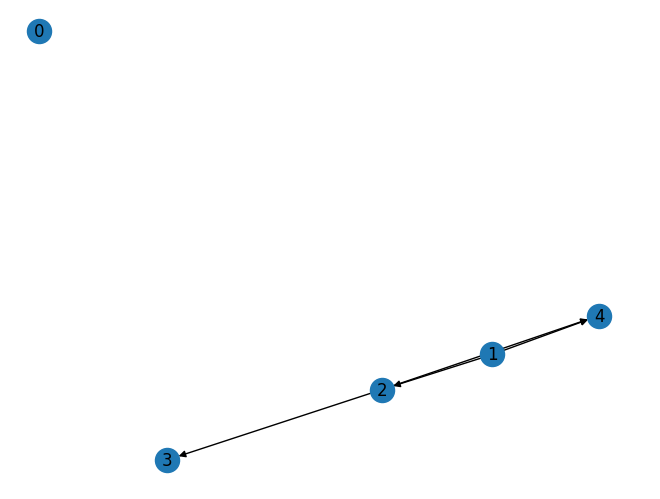

In [ ]:
g1 = create_random_graph(5,0.8)
g1 = assign_states(g1,(1,3,1))
print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

{0, 1, 2, 3, 4}


OutEdgeDataView([])

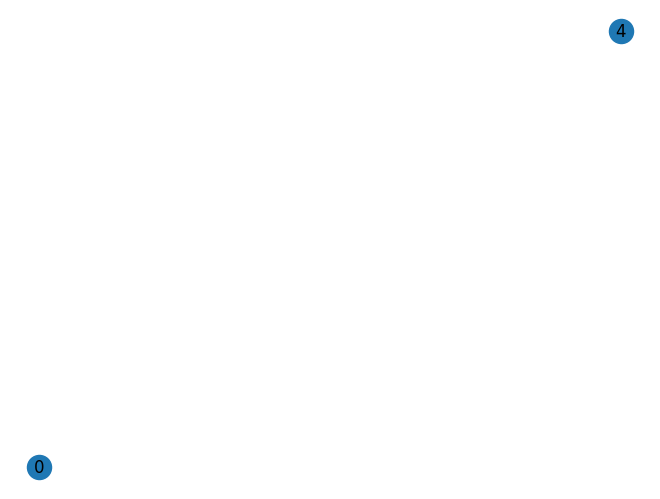

In [ ]:
g1 = to_useful(g1)
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [ ]:
g1.nodes

NodeView((0, 4))

In [ ]:
import numpy as np
import random
import tensorflow_datasets as tfds

#import minst dataset and split to test trin
mnist_dataset, mnist_info = tfds.load(name='crema_d', with_info=True, as_supervised=True)

def scale(waveform, label):
    waveform = tf.cast(waveform,tf.float64)
    spectrogram = tf.signal.stft(
    waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[..., tf.newaxis]
    spectrogram = tf.image.resize(spectrogram,(28,28))
    label = tf.one_hot(label, 6)
    return spectrogram, label

train_data = mnist_dataset['train'].map(scale)
test_data = mnist_dataset['test'].map(scale)
train_image , train_label = next(iter(train_data.batch(1)))

train_ds = train_data.shuffle(10).cache().prefetch(10).batch(64)
test_ds = test_data.cache().prefetch(10).batch(64)

print(train_image.shape)
print(train_label.shape)

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1, 28, 28, 1)
(1, 6)


In [ ]:
'''mnist_dataset , mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
train_data = mnist_dataset['train']
test_data = mnist_dataset['test']
def scale(image, label):
    image = tf.cast(image,tf.float64)
    image = image/255
    label = tf.one_hot(label, 10)
    return image, label
train_data = train_data.map(scale)
test_data = test_data.map(scale)
train_ds = train_data.cache().batch(64).prefetch(10)
test_ds = test_data.cache().batch(64).prefetch(10)
train_image , train_label = next(iter(train_data.batch(1)))
print(train_image.shape)
print(train_label)'''

"mnist_dataset , mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)\ntrain_data = mnist_dataset['train']\ntest_data = mnist_dataset['test']\ndef scale(image, label):\n    image = tf.cast(image,tf.float64)\n    image = image/255\n    label = tf.one_hot(label, 10)\n    return image, label\ntrain_data = train_data.map(scale)\ntest_data = test_data.map(scale)\ntrain_ds = train_data.cache().batch(64).prefetch(10)\ntest_ds = test_data.cache().batch(64).prefetch(10)\ntrain_image , train_label = next(iter(train_data.batch(1)))\nprint(train_image.shape)\nprint(train_label)"

In [ ]:
model = create_model(g1,(28,28,1),10)

IndexError: list index out of range

In [ ]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),
                                                                                                               #tf.keras.metrics.AUC(from_logits=True),
                                                                                                               #tf.keras.metrics.Precision(),
                                                                                                               #tf.keras.metrics.Recall()
                                                                                                               ])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
fig , ax = plt.subplots(2,1)
g3 = mutate_dag(g1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g3, with_labels=True, ax=ax[1])
plt.draw()


In [ ]:
g4 = crossover(g1,g3)
fig , ax = plt.subplots(2,1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g4, with_labels=True, ax=ax[1])
plt.draw()

In [ ]:
from graph import create_random_graph , to_useful, assign_states
dag = to_useful(g1)

In [ ]:
in1 = Individual((28,28,1),(6),(1,3,1),5,0.9)
tf.keras.utils.plot_model(in1.model, to_file='model.png', show_shapes=True)
model = in1.model
visualkeras.layered_view(model, to_file='output.png').show() # view model structure in jupyter (suggested)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
callback = tf.keras.callbacks.ReduceLROnPlateau()
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.Accuracy(),
                                                                                                               #tf.keras.metrics.AUC(from_logits=True),
                                                                                                               #tf.keras.metrics.Precision(),
                                                                                                               #tf.keras.metrics.Recall()
                                                                                                               ])
model.summary()

In [ ]:
model.fit(train_ds,validation_data=test_ds, epochs=10, callbacks=[callback])

In [ ]:
ga = Generation(input_size=(28,28,1),output_size=(6),states=(1,8,1),nodes=10,edges=0.6,population=7,limit=18,train_ds=train_ds,test_ds=test_ds)
ga.run(10,0.8,0.8)